# DATASET OVERVIEW

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Data Loading and Basic Information
print("=== HDB Resale Price Data Analysis ===")
print("\n1. Data Loading and Basic Information")

# Load data
df = pd.read_csv('train.csv')
print(f"Dataset shape: {df.shape}")
print(f"Dataset contains {df.shape[0]} records and {df.shape[1]} features")

# Display first few rows
print("\nFirst 5 rows of data:")
print(df.head())

# Basic data information
print("\nBasic data information:")
print(df.info())

# Descriptive statistics
print("\nDescriptive statistics for numerical features:")
print(df.describe())

# Check missing values
print("\nMissing values analysis:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])


=== HDB Resale Price Data Analysis ===

1. Data Loading and Basic Information
Dataset shape: (162691, 11)
Dataset contains 162691 records and 11 features

First 5 rows of data:
     MONTH           TOWN FLAT_TYPE BLOCK              STREET FLOOR_RANGE  \
0  2020-10      woodlands    4 room  681B  woodlands drive 62    07 to 09   
1  2021-07         bishan    4 room   264    bishan street 24    07 to 09   
2  2021-05  bukit panjang    4 room   520       jelapang road    19 to 21   
3  2021-08        punggol    4 room  121B     edgedale plains    16 to 18   
4  2023-05        hougang    5 room  997B   Buangkok Crescent    10 to 12   

   FLOOR_AREA_SQM         FLAT_MODEL   ECO_CATEGORY  LEASE_COMMENCE_DATA  \
0           102.0  premium apartment  uncategorized                 2000   
1           104.0            model a  uncategorized                 1992   
2           102.0            model a  uncategorized                 1998   
3            93.0            model a  uncategorized     

# EDA

## 2.1 data distribution

NOTICE!!!log can turn to normal distribution, need to transform back when do inference



=== 2. Exploratory Data Analysis (EDA) ===


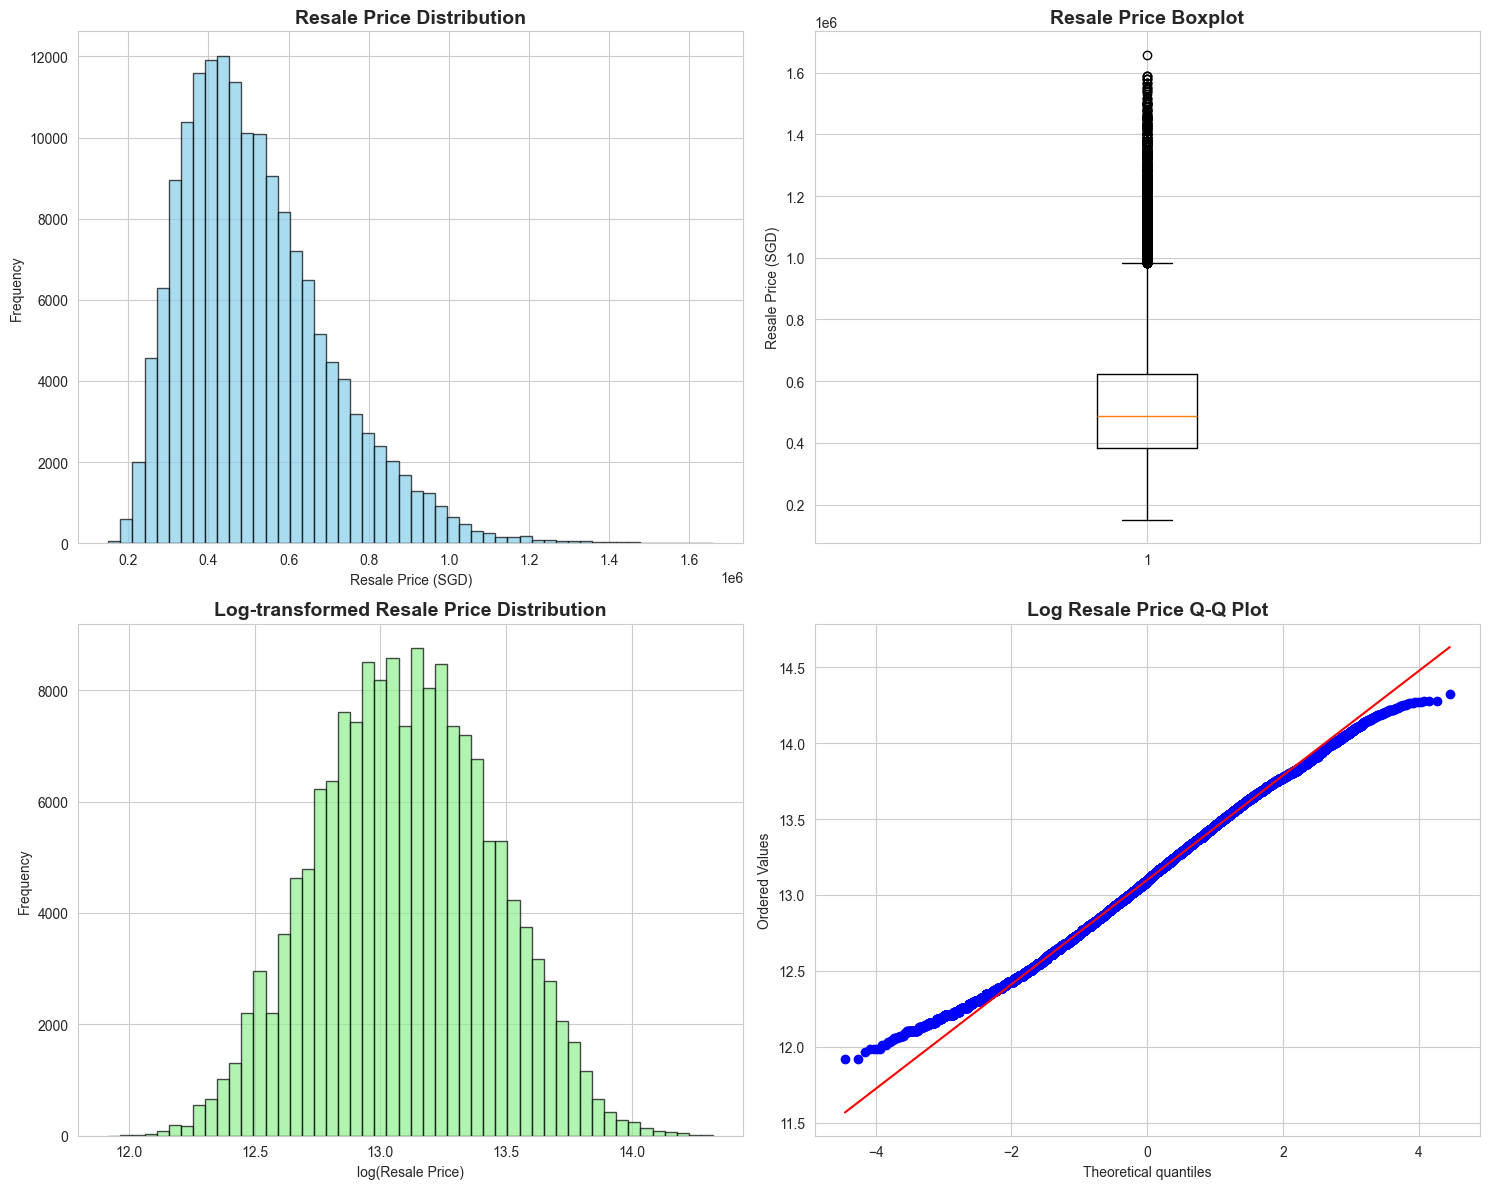


Resale Price Statistics:
Mean price: $518,843.00
Median price: $488,000.00
Minimum price: $150,000.00
Maximum price: $1,658,888.00
Standard deviation: $183,244.25

Log-transformed Resale Price Statistics:
Mean log price: 13.0999
Median log price: 13.0981
Minimum log price: 11.9184
Maximum log price: 14.3217
Standard deviation: 0.3447


In [2]:
# 2. Exploratory Data Analysis (EDA) - Targeting Resale Price
print("\n\n=== 2. Exploratory Data Analysis (EDA) ===")

# Apply log transformation to resale price
df['LOG_RESALE_PRICE'] = np.log(df['RESALE_PRICE'])

# 2.1 Resale Price Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Resale price histogram
axes[0,0].hist(df['RESALE_PRICE'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Resale Price Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Resale Price (SGD)')
axes[0,0].set_ylabel('Frequency')

# Resale price boxplot
axes[0,1].boxplot(df['RESALE_PRICE'])
axes[0,1].set_title('Resale Price Boxplot', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Resale Price (SGD)')

# Log-transformed price distribution
axes[1,0].hist(df['LOG_RESALE_PRICE'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Log-transformed Resale Price Distribution', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('log(Resale Price)')
axes[1,0].set_ylabel('Frequency')

# Q-Q plot for normality test
from scipy import stats
stats.probplot(df['LOG_RESALE_PRICE'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Log Resale Price Q-Q Plot', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Basic price statistics
print(f"\nResale Price Statistics:")
print(f"Mean price: ${df['RESALE_PRICE'].mean():,.2f}")
print(f"Median price: ${df['RESALE_PRICE'].median():,.2f}")
print(f"Minimum price: ${df['RESALE_PRICE'].min():,.2f}")
print(f"Maximum price: ${df['RESALE_PRICE'].max():,.2f}")
print(f"Standard deviation: ${df['RESALE_PRICE'].std():,.2f}")

print(f"\nLog-transformed Resale Price Statistics:")
print(f"Mean log price: {df['LOG_RESALE_PRICE'].mean():.4f}")
print(f"Median log price: {df['LOG_RESALE_PRICE'].median():.4f}")
print(f"Minimum log price: {df['LOG_RESALE_PRICE'].min():.4f}")
print(f"Maximum log price: {df['LOG_RESALE_PRICE'].max():.4f}")
print(f"Standard deviation: {df['LOG_RESALE_PRICE'].std():.4f}")


Analysis of Price Distribution 
- The resale price distribution shows a right-skewed pattern with most properties concentrated in the $300K-$600K range.
- The presence of outliers above $1M suggests premium properties in prime locations or larger units."
- The log transformation reveals a more normal distribution, indicating that log-transformation might be beneficial for modeling.
- The Q-Q plot confirms the non-normal distribution of raw prices, supporting the need for transformation in predictive modeling.

##  2.2 Price Analysis by Different Features


2.2 Price Analysis by Different Features
clean flat type
before: ['4 room' '5 room' '3 room' '5-room' '3-room' 'executive' '4-room'
 '2-room' '2 room' '1 room' 'multi generation' '1-room']
after: ['4-room' '5-room' '3-room' 'executive' '2-room' '1-room'
 'multi generation']


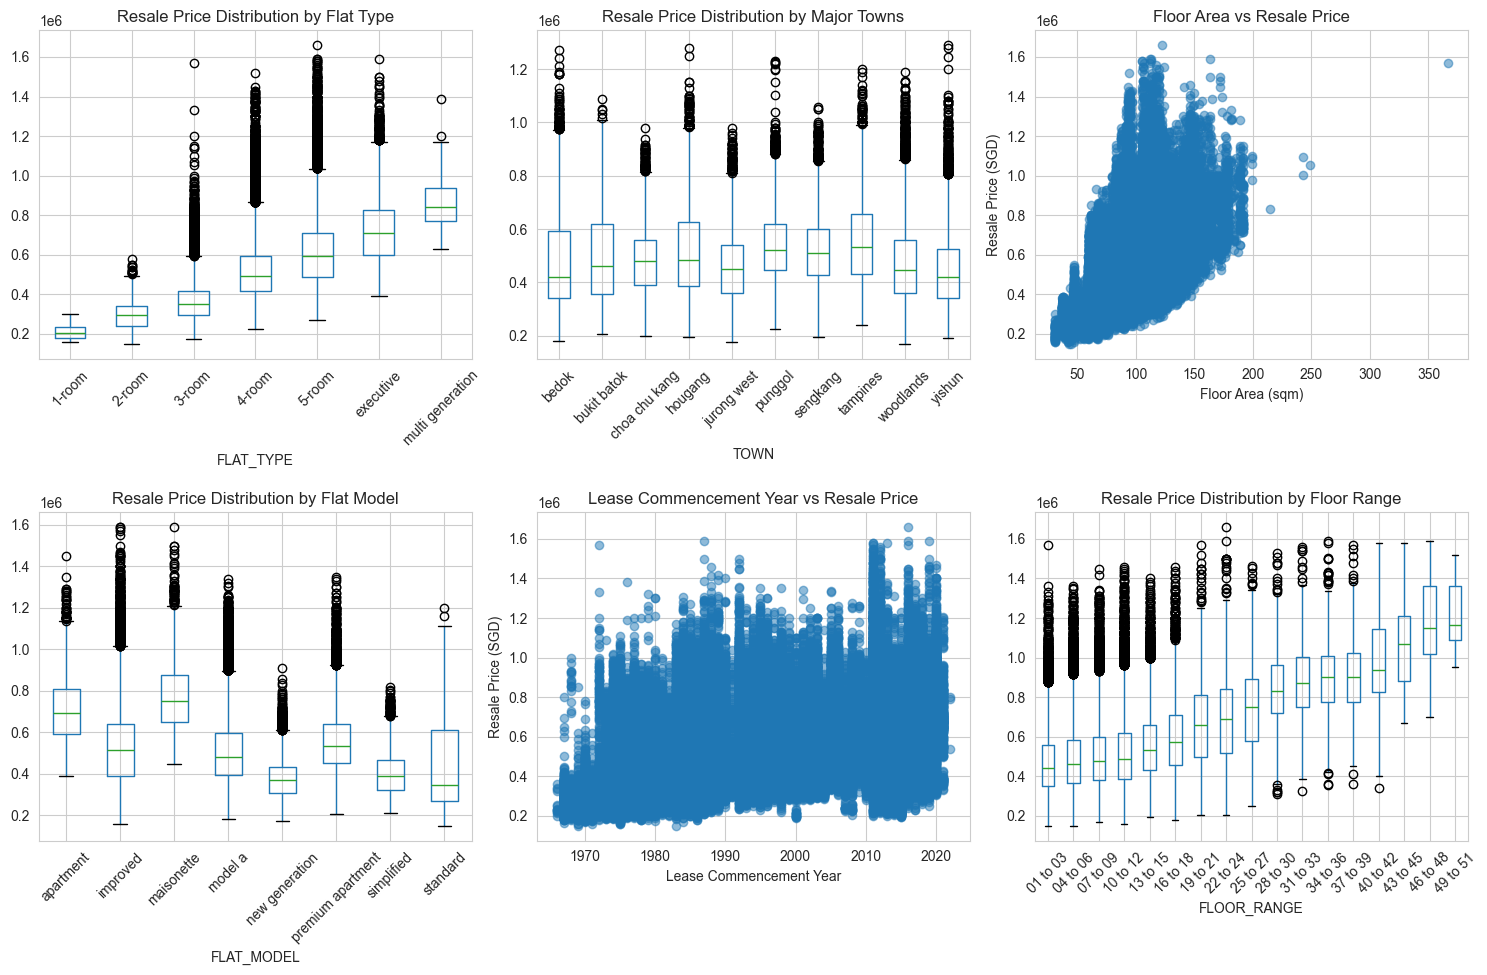

In [3]:
# 2.2 Price Analysis by Different Features
print("\n2.2 Price Analysis by Different Features")

# Analysis by flat type
# Data cleaning for flat type - standardize "x room" and "x-room" formats
print("clean flat type")
print(f"before: {df['FLAT_TYPE'].unique()}")

# Standardize flat type naming - convert "x room" to "x-room" format
df['FLAT_TYPE'] = df['FLAT_TYPE'].str.replace(' room', '-room', case=False)
df['FLAT_TYPE'] = df['FLAT_TYPE'].str.replace(' ROOM', '-ROOM', case=False)

print(f"after: {df['FLAT_TYPE'].unique()}")

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df.boxplot(column='RESALE_PRICE', by='FLAT_TYPE', ax=plt.gca())
plt.title('Resale Price Distribution by Flat Type')
plt.suptitle('')
plt.xticks(rotation=45)

# Analysis by town (top 10 towns)
plt.subplot(2, 3, 2)
top_towns = df['TOWN'].value_counts().head(10).index
df_top_towns = df[df['TOWN'].isin(top_towns)]
df_top_towns.boxplot(column='RESALE_PRICE', by='TOWN', ax=plt.gca())
plt.title('Resale Price Distribution by Major Towns')
plt.suptitle('')
plt.xticks(rotation=45)

# Analysis by floor area
plt.subplot(2, 3, 3)
plt.scatter(df['FLOOR_AREA_SQM'], df['RESALE_PRICE'], alpha=0.5)
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price (SGD)')
plt.title('Floor Area vs Resale Price')

# Analysis by flat model
plt.subplot(2, 3, 4)
top_models = df['FLAT_MODEL'].value_counts().head(8).index
df_top_models = df[df['FLAT_MODEL'].isin(top_models)]
df_top_models.boxplot(column='RESALE_PRICE', by='FLAT_MODEL', ax=plt.gca())
plt.title('Resale Price Distribution by Flat Model')
plt.suptitle('')
plt.xticks(rotation=45)

# Analysis by lease commencement year
plt.subplot(2, 3, 5)
plt.scatter(df['LEASE_COMMENCE_DATA'], df['RESALE_PRICE'], alpha=0.5)
plt.xlabel('Lease Commencement Year')
plt.ylabel('Resale Price (SGD)')
plt.title('Lease Commencement Year vs Resale Price')

# Analysis by floor range
plt.subplot(2, 3, 6)
df.boxplot(column='RESALE_PRICE', by='FLOOR_RANGE', ax=plt.gca())
plt.title('Resale Price Distribution by Floor Range')
plt.suptitle('')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Analysis of Price by Features ---
- Flat Type: cleaned  --> need encode 
- Location: quite average  --> use enternal method to evaluate correlation 
- Floor Area: Strong positive correlation between floor area and price, as expected for larger living spaces.
- Flat Model: apartment & maisonette shows premium price. --> need encode 
- Building Age: Newer buildings (higher lease commencement years) generally command higher prices, though location matters more.  --> convert to new feature Remaing age (> 99 - now + commence = remeaing years)
- Floor Level: Higher floors tend to have slightly higher prices, likely due to better views and less noise. ---> need to normalize floor level, as different build have diff max level 


2.4 Time Trend Analysis


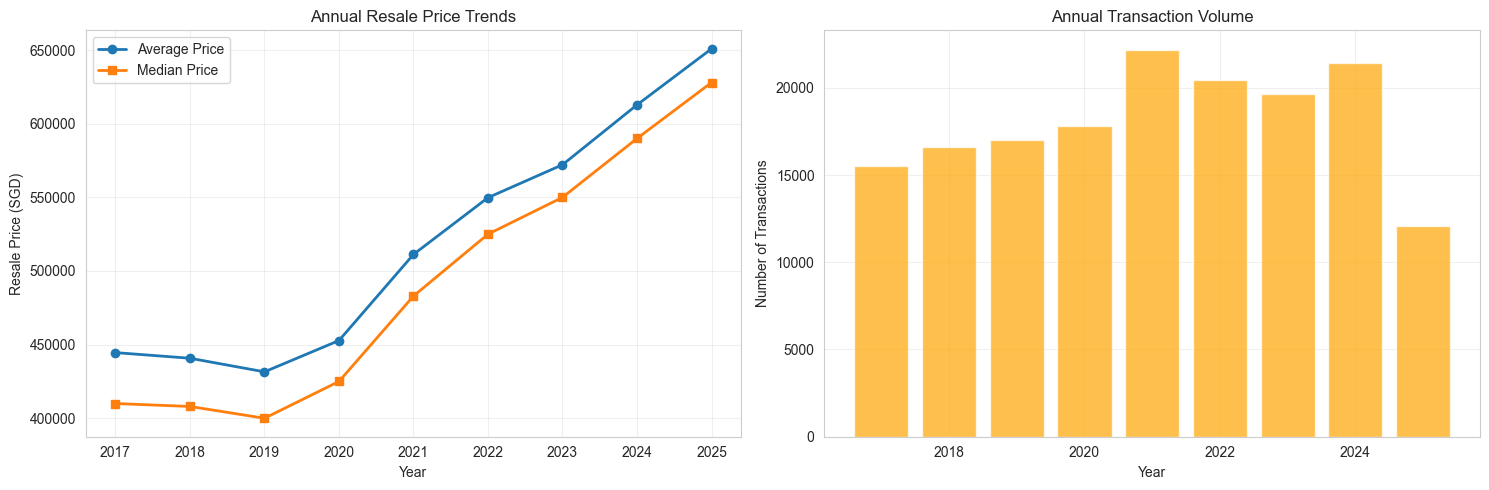


--- Analysis of Time Trends ---
Price trends show significant appreciation over the years, with both mean and median prices rising consistently.
The gap between mean and median prices indicates the presence of high-value outliers affecting the average.
Transaction volumes vary by year, with some years showing higher market activity than others.
The upward price trend reflects Singapore's robust property market and inflation effects over time.
Future projections (2024-2025) in the dataset suggest continued price appreciation, though these should be validated.


In [4]:
# 2.3 Time Trend Analysis
print("\n2.4 Time Trend Analysis")
df['YEAR'] = df['MONTH'].str[:4].astype(int)
df['MONTH_NUM'] = df['MONTH'].str[5:].astype(int)

# Annual price trend analysis
yearly_price = df.groupby('YEAR')['RESALE_PRICE'].agg(['mean', 'median', 'count']).reset_index()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(yearly_price['YEAR'], yearly_price['mean'], marker='o', linewidth=2, label='Average Price')
plt.plot(yearly_price['YEAR'], yearly_price['median'], marker='s', linewidth=2, label='Median Price')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')
plt.title('Annual Resale Price Trends')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(yearly_price['YEAR'], yearly_price['count'], alpha=0.7, color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Annual Transaction Volume')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n--- Analysis of Time Trends ---")
print("Price trends show significant appreciation over the years, with both mean and median prices rising consistently.")
print("The gap between mean and median prices indicates the presence of high-value outliers affecting the average.")
print("Transaction volumes vary by year, with some years showing higher market activity than others.")
print("The upward price trend reflects Singapore's robust property market and inflation effects over time.")
print("Future projections (2024-2025) in the dataset suggest continued price appreciation, though these should be validated.")



=== 3. Data Preprocessing and Feature Engineering ===
3.1 Missing Values Handling
No missing values detected in the dataset - no imputation required.

3.2 Feature Engineering
New features created:
- TRANSACTION_YEAR, TRANSACTION_MONTH: Extracted from MONTH
- REMAINING_AGE: Age of building at time of sale
- FLOOR_LEVEL_LOW, FLOOR_LEVEL_HIGH, FLOOR_LEVEL_MID: Floor level information
- PRICE_PER_SQM: Price per square meter
- Standardized categorical features

3.3 Categorical Variables Encoding
Dataset shape after encoding: (162691, 25)
FLAT_TYPE and FLAT_MODEL both label encoded

3.4 Feature Scaling and Normalization
Scaling completed for numerical features:
- Standard scaling (mean=0, std=1)
- Min-Max normalization (range 0-1)

3.5 Outlier Detection and Treatment
RESALE_PRICE: 2902 outliers detected (bounds: 22000.00 - 982000.00)
FLOOR_AREA_SQM: 914 outliers detected (bounds: 37.00 - 157.00)
PRICE_PER_SQM: 6262 outliers detected (bounds: 1548.55 - 8881.76)


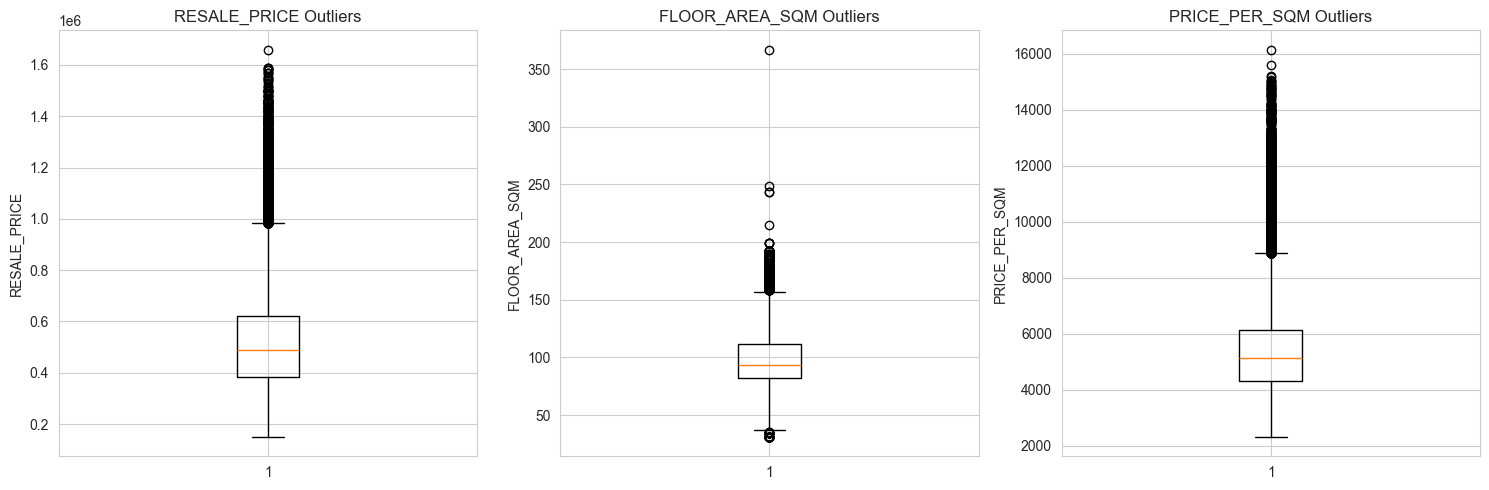


--- Analysis of Data Preprocessing and Feature Engineering ---
Feature Engineering: Successfully created meaningful derived features including remaining building age, floor levels, and price per sqm.
These new features provide additional insights and may improve model performance by capturing non-linear relationships.
Categorical Encoding: Applied appropriate encoding strategies - label encoding for ordinal data and one-hot encoding for nominal data.
The significant increase in dimensions after one-hot encoding suggests the need for dimensionality reduction techniques.
Feature Scaling: Both standard scaling and min-max normalization were applied to handle different scales across numerical features.
Outlier Detection: Identified outliers in key features, particularly in resale prices and price per sqm, which may represent luxury properties.
The preprocessing pipeline prepares the data effectively for machine learning algorithms while preserving important information.

Final processed d

In [5]:
# 3. Data Preprocessing and Feature Engineering
print("\n\n=== 3. Data Preprocessing and Feature Engineering ===")

# Create a copy for preprocessing
df_processed = df.copy()

# 3.1 Handle Missing Values (already confirmed no missing values)
print("3.1 Missing Values Handling")
print("No missing values detected in the dataset - no imputation required.")

# 3.2 Feature Engineering
print("\n3.2 Feature Engineering")

# Extract year and month from MONTH column
df_processed['TRANSACTION_YEAR'] = df_processed['MONTH'].str[:4].astype(int)
df_processed['TRANSACTION_MONTH'] = df_processed['MONTH'].str[5:].astype(int)

# Calculate releaning building age at time of sale
df_processed['REMAINING_AGE'] = 99 - df_processed['TRANSACTION_YEAR'] + df_processed['LEASE_COMMENCE_DATA']

# Extract floor level information
df_processed['FLOOR_LEVEL_LOW'] = df_processed['FLOOR_RANGE'].str.split(' to ').str[0].astype(int)
df_processed['FLOOR_LEVEL_HIGH'] = df_processed['FLOOR_RANGE'].str.split(' to ').str[1].astype(int)
df_processed['FLOOR_LEVEL_MID'] = (df_processed['FLOOR_LEVEL_LOW'] + df_processed['FLOOR_LEVEL_HIGH']) / 2

# Create price per sqm feature
df_processed['PRICE_PER_SQM'] = df_processed['RESALE_PRICE'] / df_processed['FLOOR_AREA_SQM']

# Create categorical features for analysis
df_processed['FLAT_TYPE_CATEGORY'] = df_processed['FLAT_TYPE'].str.replace('-', ' ').str.title()
df_processed['TOWN_CATEGORY'] = df_processed['TOWN'].str.title()

print("New features created:")
print("- TRANSACTION_YEAR, TRANSACTION_MONTH: Extracted from MONTH")
print("- REMAINING_AGE: Age of building at time of sale")
print("- FLOOR_LEVEL_LOW, FLOOR_LEVEL_HIGH, FLOOR_LEVEL_MID: Floor level information")
print("- PRICE_PER_SQM: Price per square meter")
print("- Standardized categorical features")

# 3.3 Categorical Variables Encoding
print("\n3.3 Categorical Variables Encoding")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Label encoding for ordinal variables
le_flat_type = LabelEncoder()
df_processed['FLAT_TYPE_ENCODED'] = le_flat_type.fit_transform(df_processed['FLAT_TYPE'])

# Label encoding for FLAT_MODEL as well
le_flat_model = LabelEncoder()
df_processed['FLAT_MODEL_ENCODED'] = le_flat_model.fit_transform(df_processed['FLAT_MODEL'])

print(f"Dataset shape after encoding: {df_processed.shape}")
print(f"FLAT_TYPE and FLAT_MODEL both label encoded")

# 3.4 Feature Scaling and Normalization
print("\n3.4 Feature Scaling and Normalization")

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features for scaling
numerical_features = ['FLOOR_AREA_SQM', 'LEASE_COMMENCE_DATA', 'REMAINING_AGE', 
                     'FLOOR_LEVEL_MID', 'TRANSACTION_YEAR']

# Standard scaling
scaler_standard = StandardScaler()
df_processed[['FLOOR_AREA_SQM_SCALED', 'LEASE_COMMENCE_DATA_SCALED', 
              'REMAINING_AGE_SCALED', 'FLOOR_LEVEL_MID_SCALED', 
              'TRANSACTION_YEAR_SCALED']] = scaler_standard.fit_transform(df_processed[numerical_features])

# Min-Max scaling
scaler_minmax = MinMaxScaler()
df_processed[['FLOOR_AREA_SQM_NORM', 'LEASE_COMMENCE_DATA_NORM', 
              'REMAINING_AGE_NORM', 'FLOOR_LEVEL_MID_NORM', 
              'TRANSACTION_YEAR_NORM']] = scaler_minmax.fit_transform(df_processed[numerical_features])

print("Scaling completed for numerical features:")
print("- Standard scaling (mean=0, std=1)")
print("- Min-Max normalization (range 0-1)")

# 3.5 Outlier Detection and Treatment
print("\n3.5 Outlier Detection and Treatment")

# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in key features
outlier_features = ['RESALE_PRICE', 'FLOOR_AREA_SQM', 'PRICE_PER_SQM']
for feature in outlier_features:
    outliers, lower, upper = detect_outliers_iqr(df_processed, feature)
    print(f"{feature}: {len(outliers)} outliers detected (bounds: {lower:.2f} - {upper:.2f})")

# Visualize outliers
plt.figure(figsize=(15, 5))
for i, feature in enumerate(outlier_features):
    plt.subplot(1, 3, i+1)
    plt.boxplot(df_processed[feature])
    plt.title(f'{feature} Outliers')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

print("\n--- Analysis of Data Preprocessing and Feature Engineering ---")
print("Feature Engineering: Successfully created meaningful derived features including remaining building age, floor levels, and price per sqm.")
print("These new features provide additional insights and may improve model performance by capturing non-linear relationships.")
print("Categorical Encoding: Applied appropriate encoding strategies - label encoding for ordinal data and one-hot encoding for nominal data.")
print("The significant increase in dimensions after one-hot encoding suggests the need for dimensionality reduction techniques.")
print("Feature Scaling: Both standard scaling and min-max normalization were applied to handle different scales across numerical features.")
print("Outlier Detection: Identified outliers in key features, particularly in resale prices and price per sqm, which may represent luxury properties.")
print("The preprocessing pipeline prepares the data effectively for machine learning algorithms while preserving important information.")

# Display final processed dataset info
print(f"\nFinal processed dataset shape: {df_processed.shape}")
print("\nSample of processed features:")
print(df_processed[['RESALE_PRICE', 'REMAINING_AGE', 'FLOOR_LEVEL_MID', 'PRICE_PER_SQM']].head())



In [6]:
# 4. Feature Selection - Keep Only Specified Columns
print("\n4. Feature Selection")
print("Selecting only the specified columns for analysis...")

# Define the columns to keep
columns_to_keep = [
    'RESALE_PRICE',
    'FLOOR_AREA_SQM', 
    'REMAINING_AGE',
    'TRANSACTION_YEAR',
    'FLOOR_LEVEL_MID',
    'FLAT_TYPE_ENCODED',
    'FLAT_MODEL_ENCODED',
    'TOWN',
    'BLOCK', 
    'STREET'
]

# Check which columns exist in the dataset
existing_columns = [col for col in columns_to_keep if col in df_processed.columns]
missing_columns = [col for col in columns_to_keep if col not in df_processed.columns]

print(f"Columns found in dataset: {existing_columns}")
if missing_columns:
    print(f"Columns not found in dataset: {missing_columns}")

print(f"\nOriginal dataset shape: {df_processed.shape}")

# Apply filtering directly to df_processed
df_processed = df_processed[existing_columns]

print(f"Filtered dataset shape: {df_processed.shape}")
print(f"Columns retained: {len(existing_columns)}")

print("\nFiltered Dataset Info:")
print(df_processed.info())

print("\nFirst 5 rows of filtered dataset:")
print(df_processed.head())




4. Feature Selection
Selecting only the specified columns for analysis...
Columns found in dataset: ['RESALE_PRICE', 'FLOOR_AREA_SQM', 'REMAINING_AGE', 'TRANSACTION_YEAR', 'FLOOR_LEVEL_MID', 'FLAT_TYPE_ENCODED', 'FLAT_MODEL_ENCODED', 'TOWN', 'BLOCK', 'STREET']

Original dataset shape: (162691, 35)
Filtered dataset shape: (162691, 10)
Columns retained: 10

Filtered Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162691 entries, 0 to 162690
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   RESALE_PRICE        162691 non-null  float64
 1   FLOOR_AREA_SQM      162691 non-null  float64
 2   REMAINING_AGE       162691 non-null  int64  
 3   TRANSACTION_YEAR    162691 non-null  int64  
 4   FLOOR_LEVEL_MID     162691 non-null  float64
 5   FLAT_TYPE_ENCODED   162691 non-null  int64  
 6   FLAT_MODEL_ENCODED  162691 non-null  int64  
 7   TOWN                162691 non-null  object 
 8   BL


2.3 Numerical Features Correlation Analysis


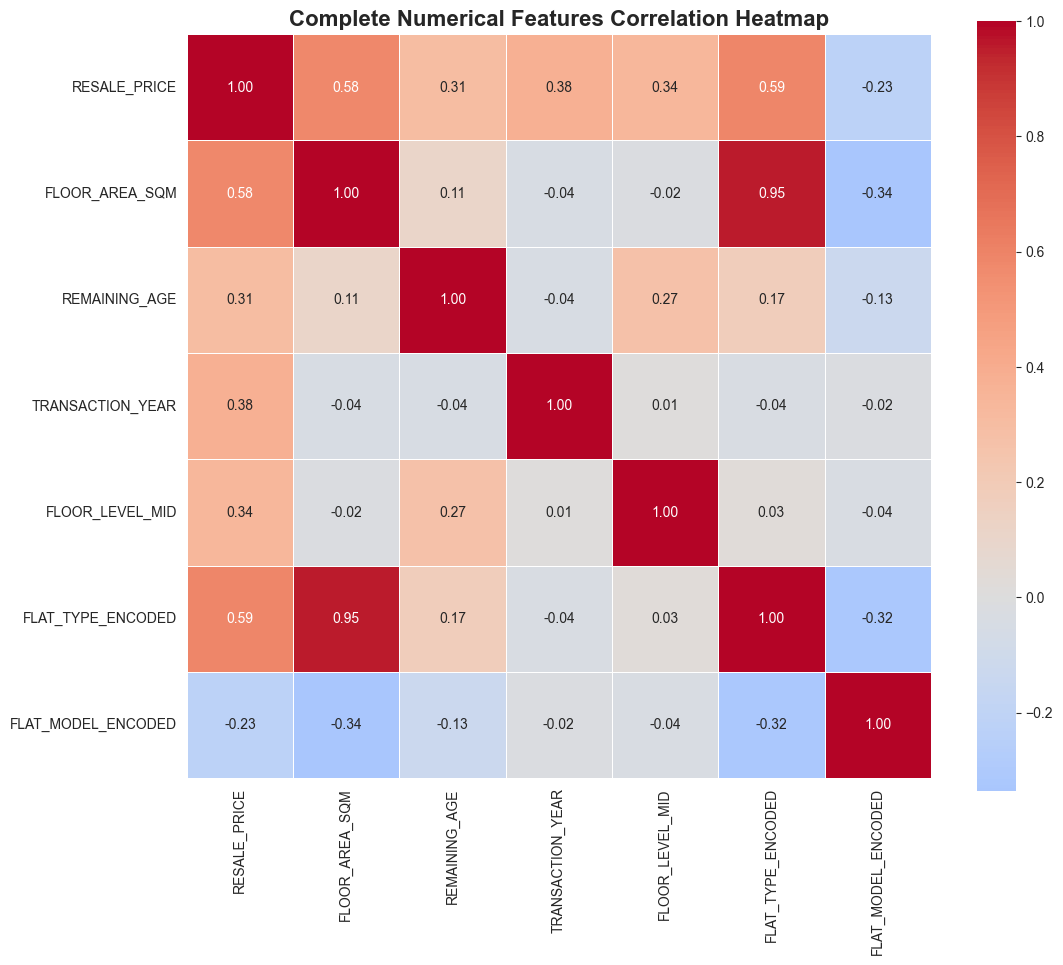

Correlation Matrix:
                    RESALE_PRICE  FLOOR_AREA_SQM  REMAINING_AGE  \
RESALE_PRICE            1.000000        0.578110       0.305490   
FLOOR_AREA_SQM          0.578110        1.000000       0.107608   
REMAINING_AGE           0.305490        0.107608       1.000000   
TRANSACTION_YEAR        0.382053       -0.042396      -0.041832   
FLOOR_LEVEL_MID         0.341653       -0.015026       0.272311   
FLAT_TYPE_ENCODED       0.589706        0.953453       0.171364   
FLAT_MODEL_ENCODED     -0.225594       -0.336357      -0.127441   

                    TRANSACTION_YEAR  FLOOR_LEVEL_MID  FLAT_TYPE_ENCODED  \
RESALE_PRICE                0.382053         0.341653           0.589706   
FLOOR_AREA_SQM             -0.042396        -0.015026           0.953453   
REMAINING_AGE              -0.041832         0.272311           0.171364   
TRANSACTION_YEAR            1.000000         0.011187          -0.038289   
FLOOR_LEVEL_MID             0.011187         1.000000          

In [7]:
# 2.3 Correlation Analysis
print("\n2.3 Numerical Features Correlation Analysis")
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df_processed[numeric_cols].corr()

# 重新排序列，使RESALE_PRICE位于对角线上（第一列和第一行）
if 'RESALE_PRICE' in correlation_matrix.columns:
    cols_reordered = ['RESALE_PRICE'] + [col for col in correlation_matrix.columns if col != 'RESALE_PRICE']
    correlation_matrix = correlation_matrix.loc[cols_reordered, cols_reordered]

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Complete Numerical Features Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

print("\n--- Analysis of Correlations ---")

